# <span style='color:#FF8383'>Assignment 13</span>
## <span style='color:#6A9C89'>DECISION TREE</span>

## <span style='color:#6A9C89'>Objective</span>
    The objective of this assingment is to apply Tree-Classification to given dataset, analyse the performance of the model, and interpret the result.

## <span style='color:#6A9C89'>Assignment Walk-Through</span>
    1. Data Preparation
    2. Exploratory Data Analysis
    3. Feature Engineering
    4. Decision Tree Classification
    5. Hyper-Parameter Tunning
    6. Model Evaluation and Analysis
    7. Interview Question

### <span style='color:#6A9C89'>1. Data Preparation</span>

In [702]:
## let's import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## notebook settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [703]:
## load the datset into your preferred data analysis environement.
file_data = pd.ExcelFile('heart_disease.xlsx')
sheet_names = file_data.sheet_names
print(f'There are {len(sheet_names)} sheets')
print(sheet_names)

There are 2 sheets
['Description', 'Heart_disease']


In [704]:
## separating both the sheet into different dataframe
### description
description_df = pd.read_excel('heart_disease.xlsx', sheet_name='Description')
print(f'Description about the data set')
description_df

Description about the data set


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
5,restecg,"ecg observation at resting condition, -- Value 0: normal\n -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to rest
9,slope,the slope of the peak exercise ST segment


In [705]:
## real dataset
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [706]:
## seeing the description and characteristics of the columns / information of the columns
### characteristics of the columns / information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [707]:
### checking the description
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [708]:
## shape of the dataset
rows, columns = df.shape
print(f'Shape of the dataset = {df.shape}')
print(f'No. of rows = {rows}')
print(f'No. of columns = {columns}')

Shape of the dataset = (908, 13)
No. of rows = 908
No. of columns = 13


In [709]:
## columns names
column_names = df.columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [710]:
print(f'Columns Data Types \n{set(df.dtypes)}')

Columns Data Types 
{dtype('float64'), dtype('bool'), dtype('int64'), dtype('O')}


In [711]:
## let's check for the unique values in each columns
print('Number of unique values present in each columns')
df.nunique()

Number of unique values present in each columns


age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [712]:
## finding out how unique values and there frequencies
for col in column_names:
    print('='*50)
    print(col)
    print('-'*50)
    print(df[col].value_counts())
    print('='*50)

age
--------------------------------------------------
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: age, dtype: int64
sex
--------------------------------------------------
Male      718
Female    190
Name: sex, dtype: int64
cp
--------------------------------------------------
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64
trestbps
--------------------------------------------------
120    128
130    114
140    100
110     58
150     55
      ... 
163      1
107      1
174      1
185      1
182      1
Name: trestbps, Length:

In [713]:
## checking for null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [714]:
## oldpeak has null values
## first let's see what its character
df.oldpeak.dtype

dtype('float64')

In [715]:
## oldpeak is float, so, we can put the mean of the whole column in the null values
df.oldpeak.fillna(df.oldpeak.mean(), inplace=True)

In [716]:
## validating null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

##### So, no more null values.

### <span style='color:#6A9C89'>2. Exploratory Data Analysis</span>

In [717]:
## before start EDA, let's divide the dataset into different categories for better exploration

### numerical columns
num_cols = [col for col in column_names if df[col].dtype in ['int64', 'float64']]
### categorical columns
cat_cols = [col for col in column_names if df[col].dtype == 'O']
### boolean columns
bol_cols = [col for col in column_names if df[col].dtype in ['bool']]

In [718]:
## exploring differentiated categories
print(f'Number of Numerical Columns => {len(num_cols)}')
print(f'{num_cols}\n')
print(f'Number of Categorical Columns => {len(cat_cols)}')
print(f'{cat_cols}\n')
print(f'Number of Boolean Columns => {len(bol_cols)}')
print(f'{bol_cols}')

Number of Numerical Columns => 6
['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

Number of Categorical Columns => 6
['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

Number of Boolean Columns => 1
['fbs']


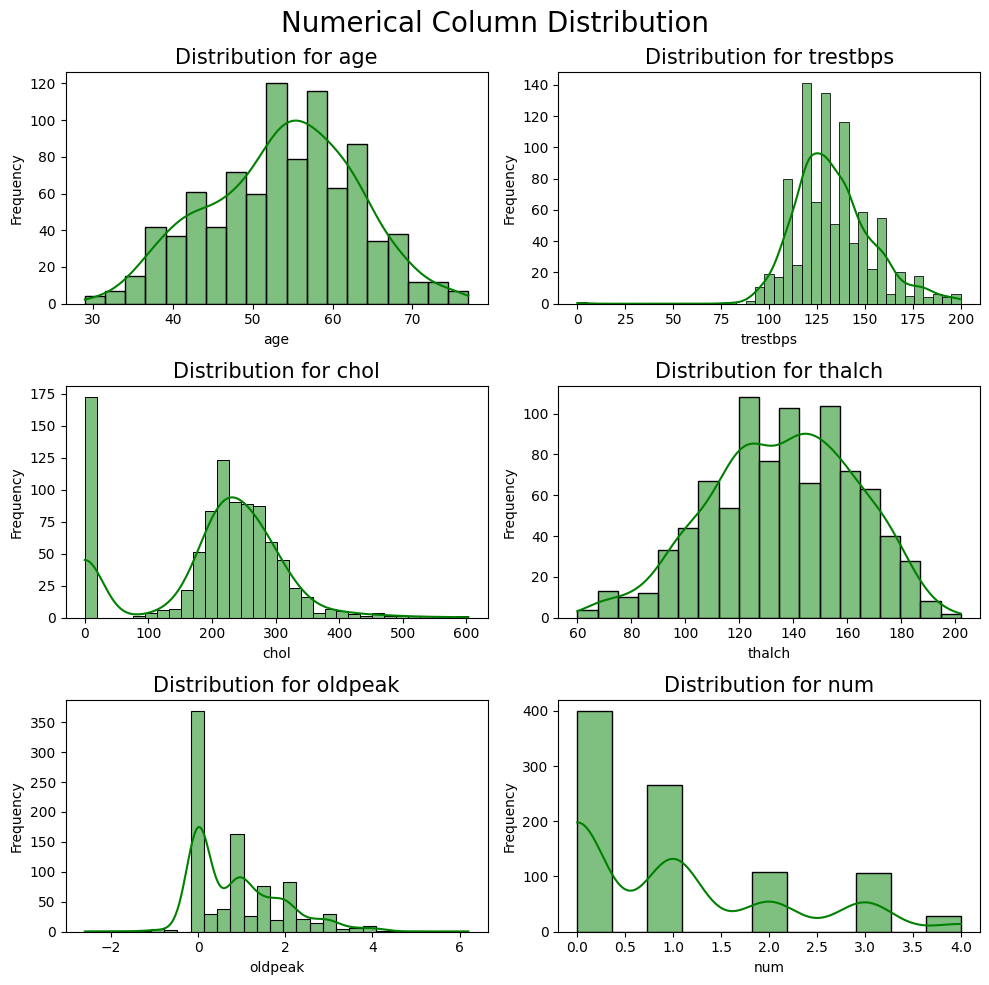

In [719]:
## data vizualization
### numerical column distribution
plt.figure(figsize=(10,10))
plt.suptitle('Numerical Column Distribution', fontsize=20)

for idx, col in enumerate(num_cols, 1):
    plt.subplot(3,2,idx)
    plt.title(f'Distribution for {col}', fontsize=15)
    sns.histplot(data=df, x=df[col], kde=True, color='green')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

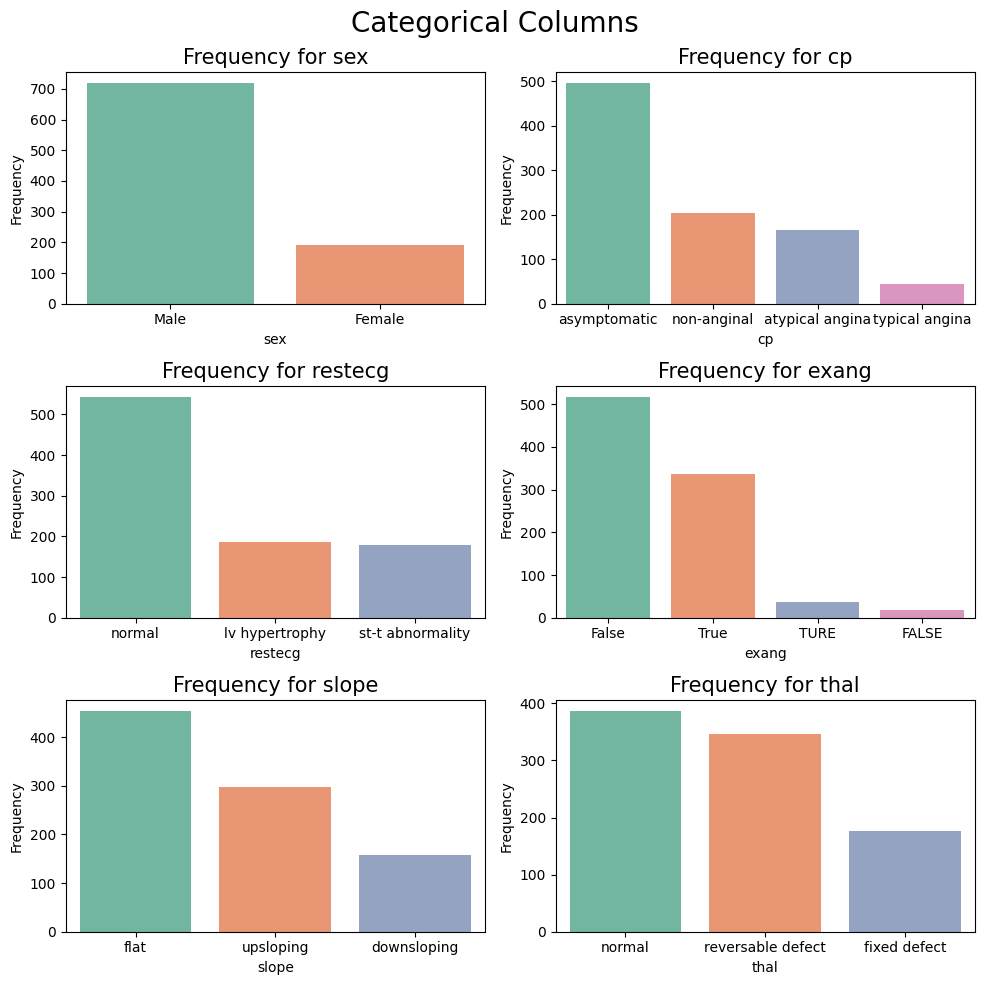

In [720]:
### categorical column distribution
plt.figure(figsize=(10,10))
plt.suptitle('Categorical Columns', fontsize=20)

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3,2,idx)
    plt.title(f'Frequency for {col}', fontsize=15)
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

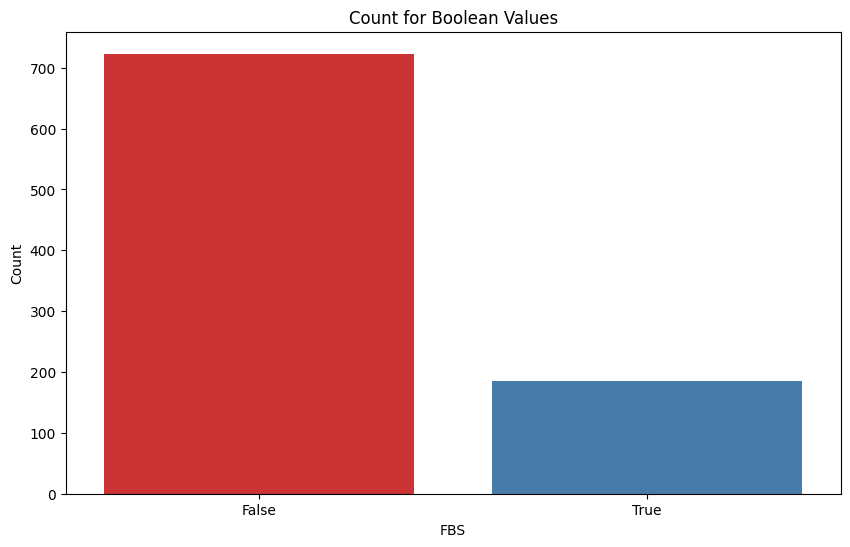

In [721]:
## boolean column
plt.figure(figsize=(10,6))
plt.title('Count for Boolean Values')
fbs_vc = df.fbs.value_counts()
sns.barplot(x=fbs_vc.index, y=fbs_vc.values, palette='Set1')
plt.xlabel('FBS')
plt.ylabel('Count')
plt.show()

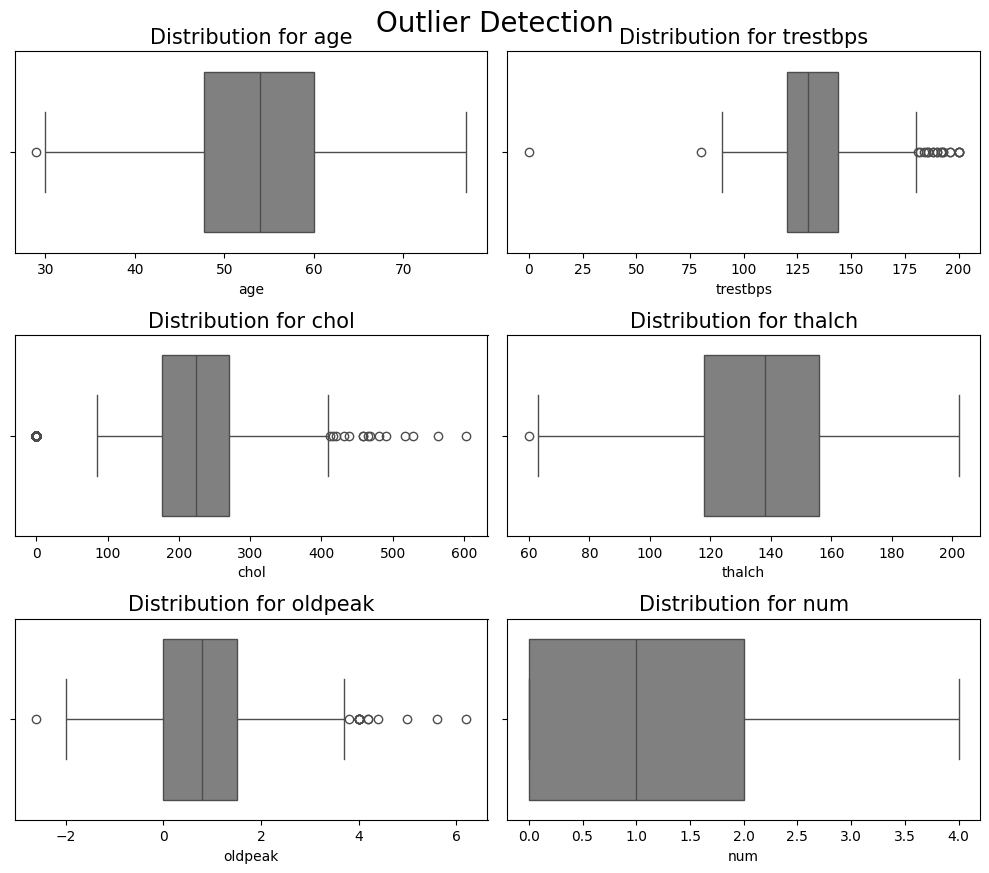

In [722]:
### detecting outliers
plt.figure(figsize=(10,20))
plt.suptitle('Outlier Detection', fontsize=20)

for idx, col in enumerate(num_cols, 1):
    plt.subplot(7,2,idx)
    plt.title(f'Distribution for {col}', fontsize=15)
    sns.boxplot(data=df, x=df[col], color='grey')
plt.tight_layout()
plt.show()

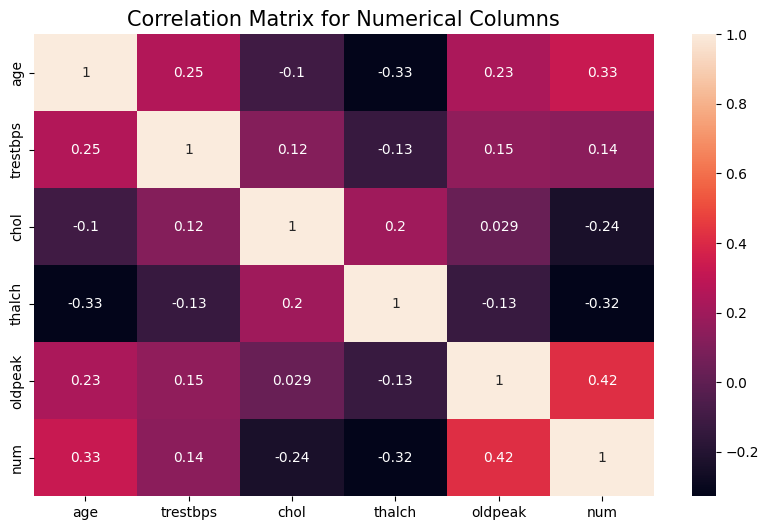

In [723]:
## vizualizing correlation
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix for Numerical Columns', fontsize=15)
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

In [724]:
## columns with outliers
outlier_columns = ['chol', 'trestbps']

In [725]:
## function for removing outliers from the data
def remove_outliers(data, columns):
    for col in columns:
        if col in data.columns:
            q1 = data[col].quantile(0.25)   ## 25 %
            q3 = data[col].quantile(0.75)   ## 75 %
            iqr = q3 - q1
            lower_bound = q1 - 1.5*iqr
            upper_bound = q3 + 1.5*iqr
            ## removind outliers
            data = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    return data

In [726]:
df = remove_outliers(df, outlier_columns)

In [727]:
df.shape

(707, 13)

##### The reduction in shape states that, the outliers have been removed

### <span style='color:#6A9C89'>3. Feature Engineering</span>

In [728]:
## checking categorical variables, unique characters
for col in cat_cols:
    print('-'*50)
    print(df[col].value_counts())

--------------------------------------------------
Male      534
Female    173
Name: sex, dtype: int64
--------------------------------------------------
asymptomatic       356
non-anginal        159
atypical angina    153
typical angina      39
Name: cp, dtype: int64
--------------------------------------------------
normal              417
lv hypertrophy      170
st-t abnormality    120
Name: restecg, dtype: int64
--------------------------------------------------
False    416
True     255
TURE      22
FALSE     14
Name: exang, dtype: int64
--------------------------------------------------
flat           347
upsloping      240
downsloping    120
Name: slope, dtype: int64
--------------------------------------------------
normal               314
reversable defect    258
fixed defect         135
Name: thal, dtype: int64


##### We, can see in the column 'exang' there are 4 categories, which gives the meaning of 2 categories

In [729]:
df.exang.value_counts()

False    416
True     255
TURE      22
FALSE     14
Name: exang, dtype: int64

In [730]:
## changing the values in exang
df.exang.replace('TURE', 'True', inplace=True) ## replacing True
df.exang.replace('FALSE', 'False', inplace=True) ## replacing False

In [731]:
## we can see there are boolean and object values
## changing the whole column into object data type
df['exang'] = df['exang'].map({
    'True' : 'True',
    'False' : 'False',
    True : 'True',
    False : 'False'
})

In [732]:
## recheking the exang column
df.exang.value_counts()

False    430
True     277
Name: exang, dtype: int64

In [733]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


In [734]:
## as fbs is a boolean column, let's convert it into object for better code running
df['fbs'] = df['fbs'].astype('object')

In [735]:
## updaing the 'cat_cols'
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [736]:
## updating numerical column, as num is our target column, transforming that could lead us to wrong prediction
num_cols = [col for col in num_cols if col != 'num']
num_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [737]:
## separating the data into dependent and independent variables
x = df.iloc[:, 0:-1]
y = df.num

In [738]:
## performing feature engineering techniques such as:
## 1. Encoding Categorical Variables
## 2. Scalling Numerical Variables

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler = StandardScaler() ## initiation of Standard Scaler
le = LabelEncoder() ## initiation of LabelEncoder
ohe = OneHotEncoder()

In [739]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect


In [740]:
## columns to be applied for one-hot-encoding
ohe_columns = ['cp', 'restecg', 'slope', 'thal']
le_columns = ['exang', 'sex']

In [741]:
## applying label encoders
label_encoders = {col: LabelEncoder() for col in le_columns}
for col in le_columns:
    x[col] = label_encoders[col].fit_transform(x[col])

In [742]:
## Pre-Processing Pipeline
preprocessor = ColumnTransformer(
    transformers= [
        ('num', scaler, num_cols),
        ('ohe', ohe, ohe_columns)
    ]
)

In [743]:
## applying pre-processor to the dataframe
processed_data = preprocessor.fit_transform(x)

In [744]:
## constructing column names
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_columns)
all_columns = num_cols + list(ohe_feature_names)

In [745]:
processed_data = pd.DataFrame(data=processed_data, index=df.index, columns=all_columns)

In [746]:
processed_data[le_columns] = x[le_columns]

In [747]:
processed_data.head()

,age,trestbps,chol,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,exang,sex
0,1.072984,0.677707,-0.199205,0.413335,1.298405,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
1,-1.336312,0.111349,-0.780860,-0.286519,-0.855729,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
2,0.415903,0.394528,-0.994134,0.335574,-0.481097,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
3,-0.131664,-0.851459,-1.110465,1.968567,-0.855729,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
4,0.415903,-1.304546,-0.819637,-0.519804,0.549141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


In [748]:
X = processed_data

In [749]:
X.head()

,age,trestbps,chol,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,exang,sex
0,1.072984,0.677707,-0.199205,0.413335,1.298405,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
1,-1.336312,0.111349,-0.780860,-0.286519,-0.855729,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
2,0.415903,0.394528,-0.994134,0.335574,-0.481097,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
3,-0.131664,-0.851459,-1.110465,1.968567,-0.855729,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
4,0.415903,-1.304546,-0.819637,-0.519804,0.549141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


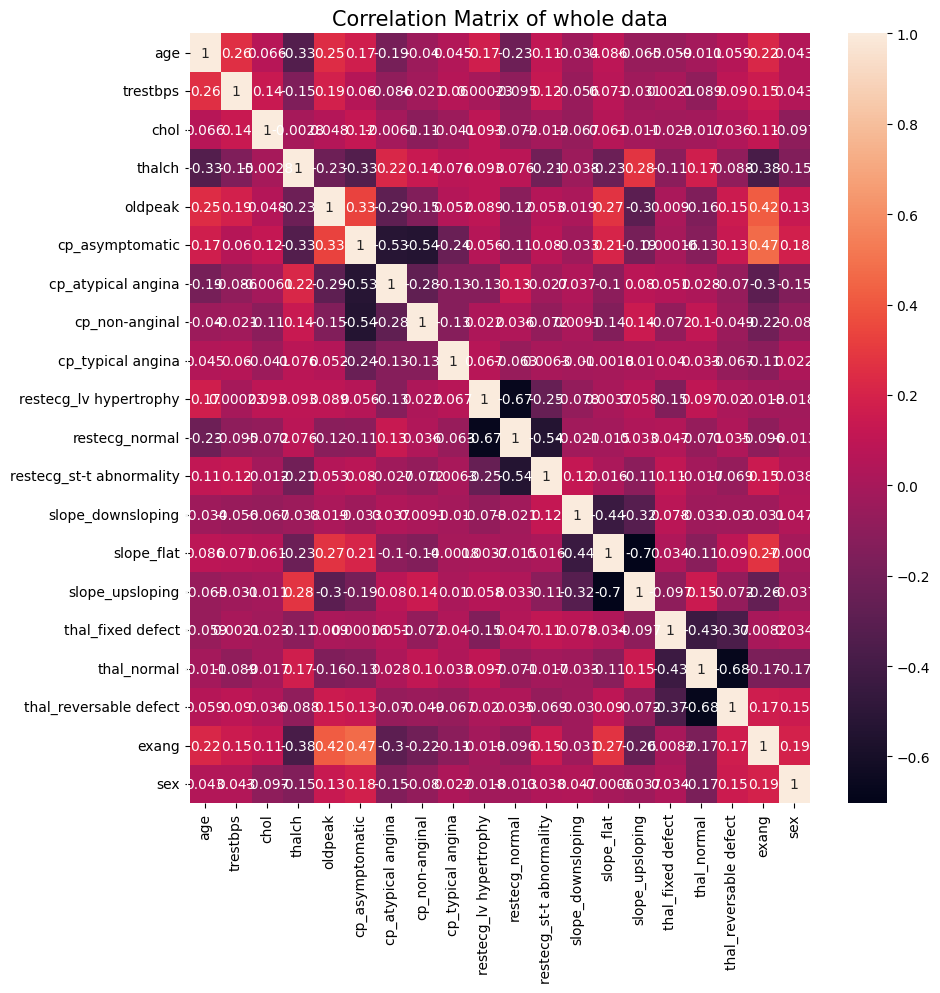

In [750]:
## vizualizing correlation
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix of whole data', fontsize=15)
sns.heatmap(X.corr(), annot=True)
plt.show()

In [751]:
X.head()

,age,trestbps,chol,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,exang,sex
0,1.072984,0.677707,-0.199205,0.413335,1.298405,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
1,-1.336312,0.111349,-0.780860,-0.286519,-0.855729,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
2,0.415903,0.394528,-0.994134,0.335574,-0.481097,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
3,-0.131664,-0.851459,-1.110465,1.968567,-0.855729,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1
4,0.415903,-1.304546,-0.819637,-0.519804,0.549141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


### <span style='color:#6A9C89'>4. Decision Tree Classification</span>

In [752]:
## spliting the dataset into training and testing sets (80:20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((565, 20), (565,), (142, 20), (142,))

In [753]:
## implementing decision tree classification 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')    ## initializing DecisionTreeClassifier

In [754]:
## training the model without parameters and prunning
model.fit(x_train, y_train)

DecisionTreeClassifier()

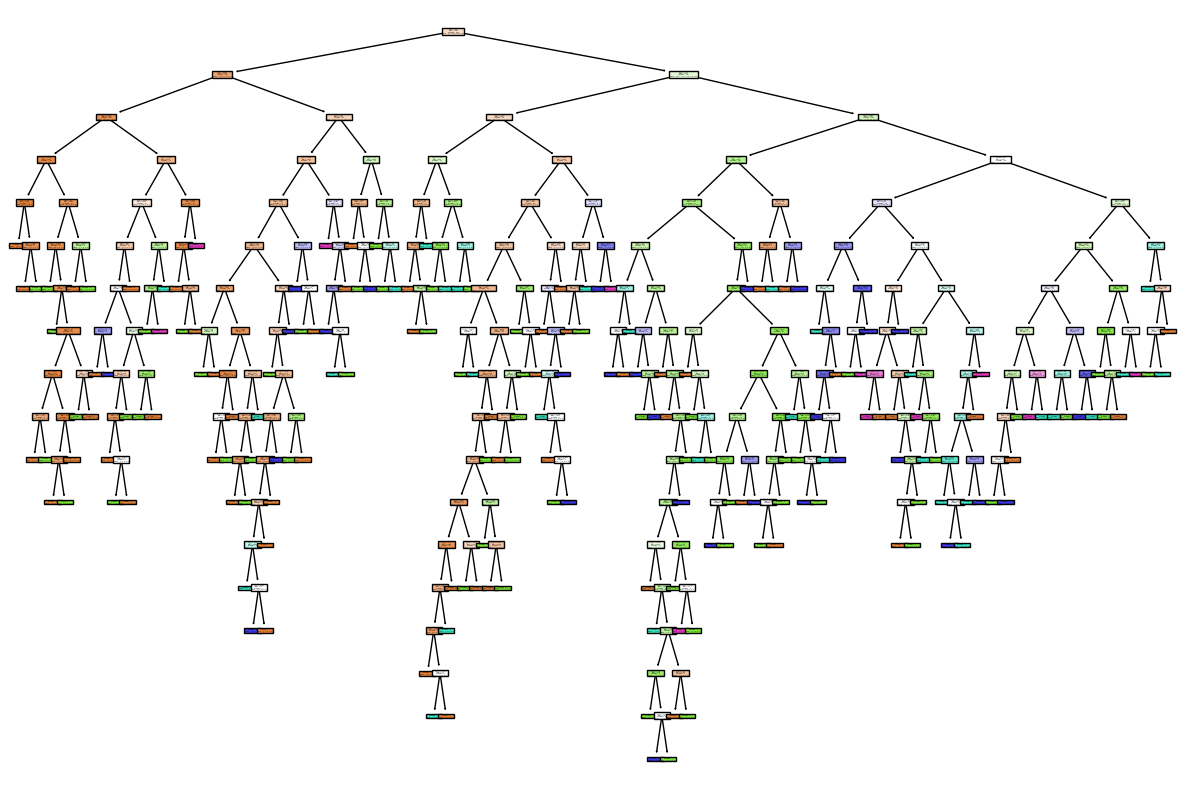

In [755]:
## plotting the decision tree for the dataset
from sklearn import tree
plt.figure(figsize=(15,10))
plt.title('Decision Tree for Heart Disease Classifier', fontsize=20)
tree.plot_tree(model, filled=True)
plt.show()

The tree seems to be more complicated and clumsy, this dataset needs to be pruned.

### Pruning : Getting an Optimal Decision Tree
##### Pruning is a process of deleting the un-necessary nodes from a tree in order to get the optimal decision tree.
#### 1. Pre-Purning
##### Pre-Pruning halts the growth of decision tree during the training phase based on certain conditions. It prevents the tree from growing too deep.
    1. Prevents Overfitting.
    2. Chances of Under-Fitting.
    3. Faster Training.
    4. Arbitary Threshold.
    5. Reduces Complexity.
#### 2. Post-Pruning
##### Post-Pruning involves building the tree to its full depth and then trimming branches based on their condition to model's overall accuracy.
    1. More Complex and Computation is expensive.
    2. Can lead to larger tree initially.
    3. Low risk of overfitting.
    4. Low risk of underfitting.
    5. More interpretable model result.

In [756]:
## making prediction
y_pred_test_model = model.predict(x_test)
y_pred_train_model = model.predict(x_train)
## probability prediction
y_pob_pred_model = model.predict_proba(x_test)

In [757]:
## evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, auc
accuracy_model = accuracy_score(y_test, y_pred_test_model)
precision_model = precision_score(y_pred_test_model, y_test, average='weighted')
recall_model = recall_score(y_test, y_pred_test_model, average='weighted')
f1_model = f1_score(y_test, y_pred_test_model, average='weighted')
print('Evaluation of Model (model)')
print(f'Accuracy: {accuracy_model}')
print(f'Precision: {precision_model}')
print(f'Recall: {recall_model}')
print(f'F1 Score: {f1_model}')

Evaluation of Model (model)
Accuracy: 0.5633802816901409
Precision: 0.5238622470668913
Recall: 0.5633802816901409
F1 Score: 0.588258435148058


In [758]:
classification_report(y_test, y_pred_model)

'              precision    recall  f1-score   support\n\n           0       0.82      0.73      0.77        89\n           1       0.27      0.24      0.25        34\n           2       0.10      0.12      0.11         8\n           3       0.07      0.17      0.10         6\n           4       0.38      0.60      0.46         5\n\n    accuracy                           0.55       142\n   macro avg       0.33      0.37      0.34       142\nweighted avg       0.60      0.55      0.57       142\n'

In [759]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes = list(y.value_counts().index))
n_classes = y_test_bin.shape[1]

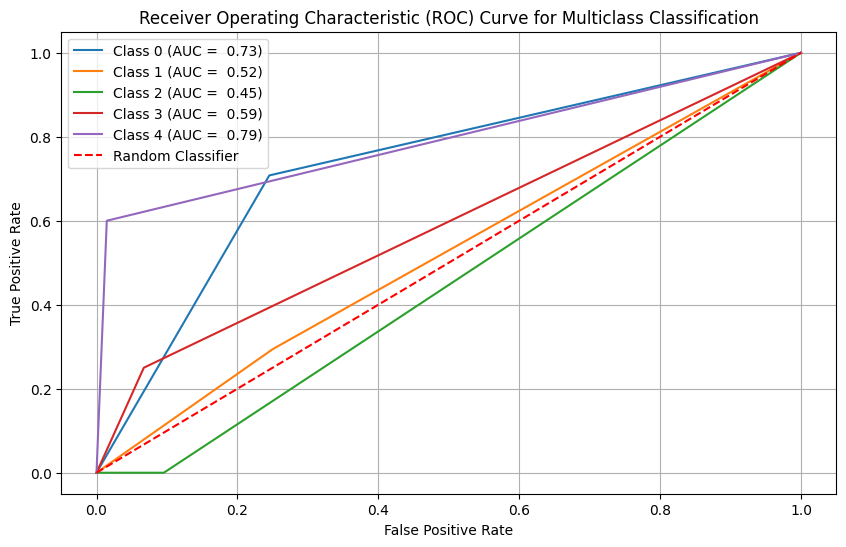

In [760]:
plt.figure(figsize=(10,6))
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pob_pred_model[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc: .2f})')
plt.plot([0,1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend()
plt.grid()
plt.show()

### <span style='color:#6A9C89'>5. Hyper-Parameter Tunning</span>

In [761]:
## performing hyper-parameter tunning to optimize the Decision Tree Model. 
### parameters
params = {
    'criterion' : ['gini', 'entropy', 'log-loss'],
    'splitter' : ["best", "random"],
    'max_depth' : [10, 20, 30, 50],
    'min_samples_split' : [2, 4, 6, 8],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'max_leaf_nodes' : [1, 5, 10, 15, 20],
    'min_impurity_decrease' : [0.1, 0.2, 0.5, 0.8, 0.9, 1.0],
}

In [762]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
## searching the best parameters using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = params, scoring = 'accuracy', cv = 5)
## fitting grid
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log-loss'],
                         'max_depth': [10, 20, 30, 50],
                         'max_leaf_nodes': [1, 5, 10, 15, 20],
                         'min_impurity_decrease': [0.1, 0.2, 0.5, 0.8, 0.9,
                                                   1.0],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

### <span style='color:#6A9C89'>6. Model Evaluation and Analysis</span>

In [763]:
## cheking best params
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [764]:
## checking best scores
grid.best_score_

0.5628318584070797

In [765]:
## checking best estimator
best_model = grid.best_estimator_

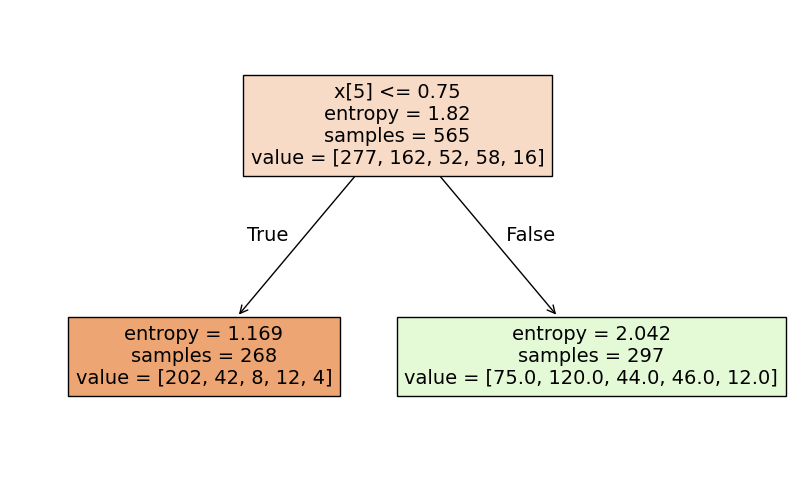

In [766]:
## decision tree for best model
## vizualize the decision tree structure to understand the rules learned be modeland identify important features.
plt.figure(figsize=(10,6))
plt.title('Decision Tree for best model')
tree.plot_tree(best_model, filled=True)
plt.show()

In [767]:
x_test.head()

,age,trestbps,chol,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,exang,sex
558,0.634930,-0.511645,-2.564603,-0.869731,0.080851,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
82,0.525417,0.960886,0.770220,0.879905,0.080851,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
78,0.415903,-0.285101,1.157990,0.763262,-0.855729,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
222,-0.679231,0.394528,0.266119,-0.169877,0.080851,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
344,-0.022151,0.394528,1.487595,0.879905,-0.855729,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1


In [768]:
## prediction for x_test best_model
y_pred_best = best_model.predict(x_test)
y_pred_proba_best = best_model.predict_proba(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_pred_best, y_test, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print('Evaluation of Model (best_model)')
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')

Evaluation of Model (best_model)
Accuracy: 0.6690140845070423
Precision: 0.759581281476034
Recall: 0.6690140845070423
F1 Score: 0.6410220512874698


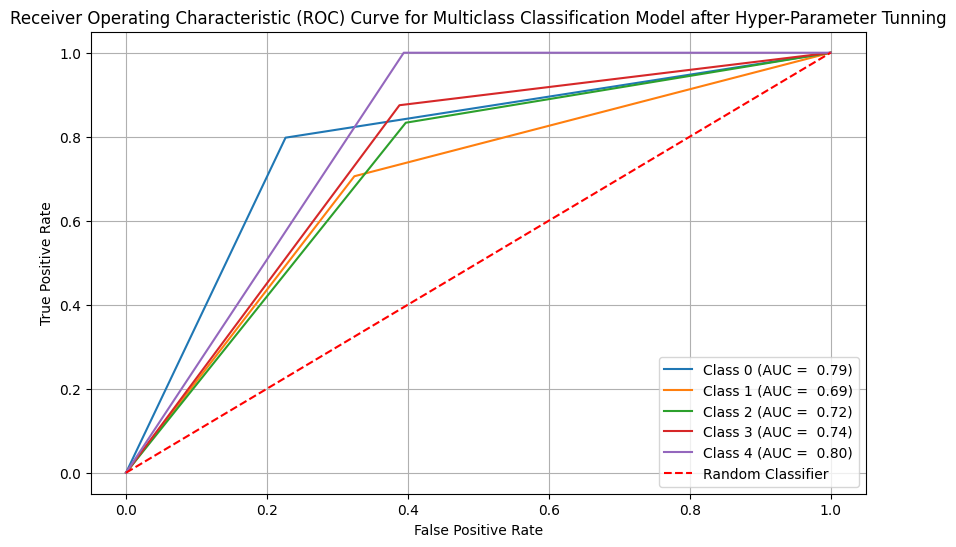

In [769]:
y_test_bin = label_binarize(y_test, classes = list(y.value_counts().index))
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10,6))
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba_best[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc: .2f})')
plt.plot([0,1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification Model after Hyper-Parameter Tunning')
plt.legend()
plt.grid()
plt.show()

### <span style='color:#6A9C89'>7. Interview Questions</span>

#### 1. What are some common hyper-parameters of decision tree models, and how do they affect the model's performance?
##### Decision Tree models have several hyper-parameter that could control their structure and behaviour, and impace their performance complexity, and ability to generalize. Here's an overview of the most common hyperparameter and their effects:
    1. Criterion : Determines the function to measure the quality of splits.
    2. Max Depth :  Limits the maximum depth of the tree.
    3. Min Samples Split : Minimum number of samples required to split an internal node.
    4. Min Samples Leaf : Minimum number of samples required to be in a leaf node.
    5. Max Features : Maximum number of features to consider for the best split.
    6. Max Leaf Nodes : Restricts the maximum number of leaf nodes in the tree.
    7. Splitter : Strategy for choosing the split at each node.

#### 2. What is the difference between the Label encoding and One-hot encoding?
##### Label Encoding and One-Hot Encoding are techniques used to convert categorical data into numerical formats suitable for machine learning models. Here’s a detailed comparison:
##### One-Hot Encoding 
    Creates a new binary column for each category, representing the presence or absence of each category with 1 or 0. For instance, ['Red', 'Green', 'Blue'] would result in three columns: Red [1, 0, 0], Green [0, 1, 0], and Blue [0, 0, 1]. While this method preserves the original nature of the data without imposing any order, it can significantly increase the dimensionality of the dataset, especially when dealing with columns containing many unique categories, leading to memory and computational challenges.

##### Label Encoding 
    is well-suited for ordinal data or tree-based models like Decision Trees and Random Forests, which are not sensitive to numerical relationships. One-Hot Encoding, on the other hand, is ideal for non-ordinal data and models like Logistic Regression or Neural Networks, which rely on numerical input without assuming any order. The choice between the two depends on the nature of the data and the requirements of the machine learning algorithm being used.